In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("preprocessed_data.csv")

In [3]:
df.head()

,Unnamed: 0,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,...,Tel,cellular,telephone,failure,pending,success,unknown,F,M,Term Deposit
0,0,1001,58,839368,2143,0,1.0,261.0,1,2,...,False,False,False,False,False,False,True,False,True,0.0
1,1,1002,44,1452858,29,0,1.0,151.0,1,2,...,False,False,False,False,False,False,True,False,True,0.0
2,2,1003,33,4851383,2,0,0.0,76.0,1,2,...,False,False,False,False,False,False,False,True,False,0.0
3,3,1004,47,3207754,1506,0,1.0,92.0,1,2,...,False,False,False,False,False,False,True,True,False,0.0
4,4,1005,33,2562322,1,1,1.0,198.0,1,2,...,False,False,False,False,False,False,True,False,True,0.0


In [5]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

C:\Users\yarra\AppData\Local\Temp\ipykernel_34444\3001203772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(df['duration'].mean(), inplace=True)


In [6]:
df['Count_Txn'].fillna(df['Count_Txn'].mean(), inplace=True)

C:\Users\yarra\AppData\Local\Temp\ipykernel_34444\2176260505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Count_Txn'].fillna(df['Count_Txn'].mean(), inplace=True)


In [7]:
df['Term Deposit'].fillna(0, inplace=True)

C:\Users\yarra\AppData\Local\Temp\ipykernel_34444\2286984934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Term Deposit'].fillna(0, inplace=True)


In [8]:
df['loan'].fillna(df['loan'].mean(), inplace=True)

C:\Users\yarra\AppData\Local\Temp\ipykernel_34444\131912938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan'].fillna(df['loan'].mean(), inplace=True)


In [9]:
df.isnull().sum()

Unnamed: 0          0
Customer_number     0
age                 0
Annual Income       0
balance             0
housing             0
loan                0
duration            0
campaign            0
last_contact_day    0
previous            0
Count_Txn           0
married             0
single              0
primary             0
secondary           0
tertiary            0
admin.              0
blue collar         0
blue-collar         0
entrepreneur        0
housemaid           0
management          0
retired             0
self-employed       0
services            0
student             0
technician          0
unemployed          0
Mobile              0
Tel                 0
cellular            0
telephone           0
failure             0
pending             0
success             0
unknown             0
F                   0
M                   0
Term Deposit        0
dtype: int64

# 1. Term Deposit and Related Variables:# 	Identify variables strongly related to Term Deposit. Discuss your approach when the variable is categorical. Which tests or metrics will you employ?


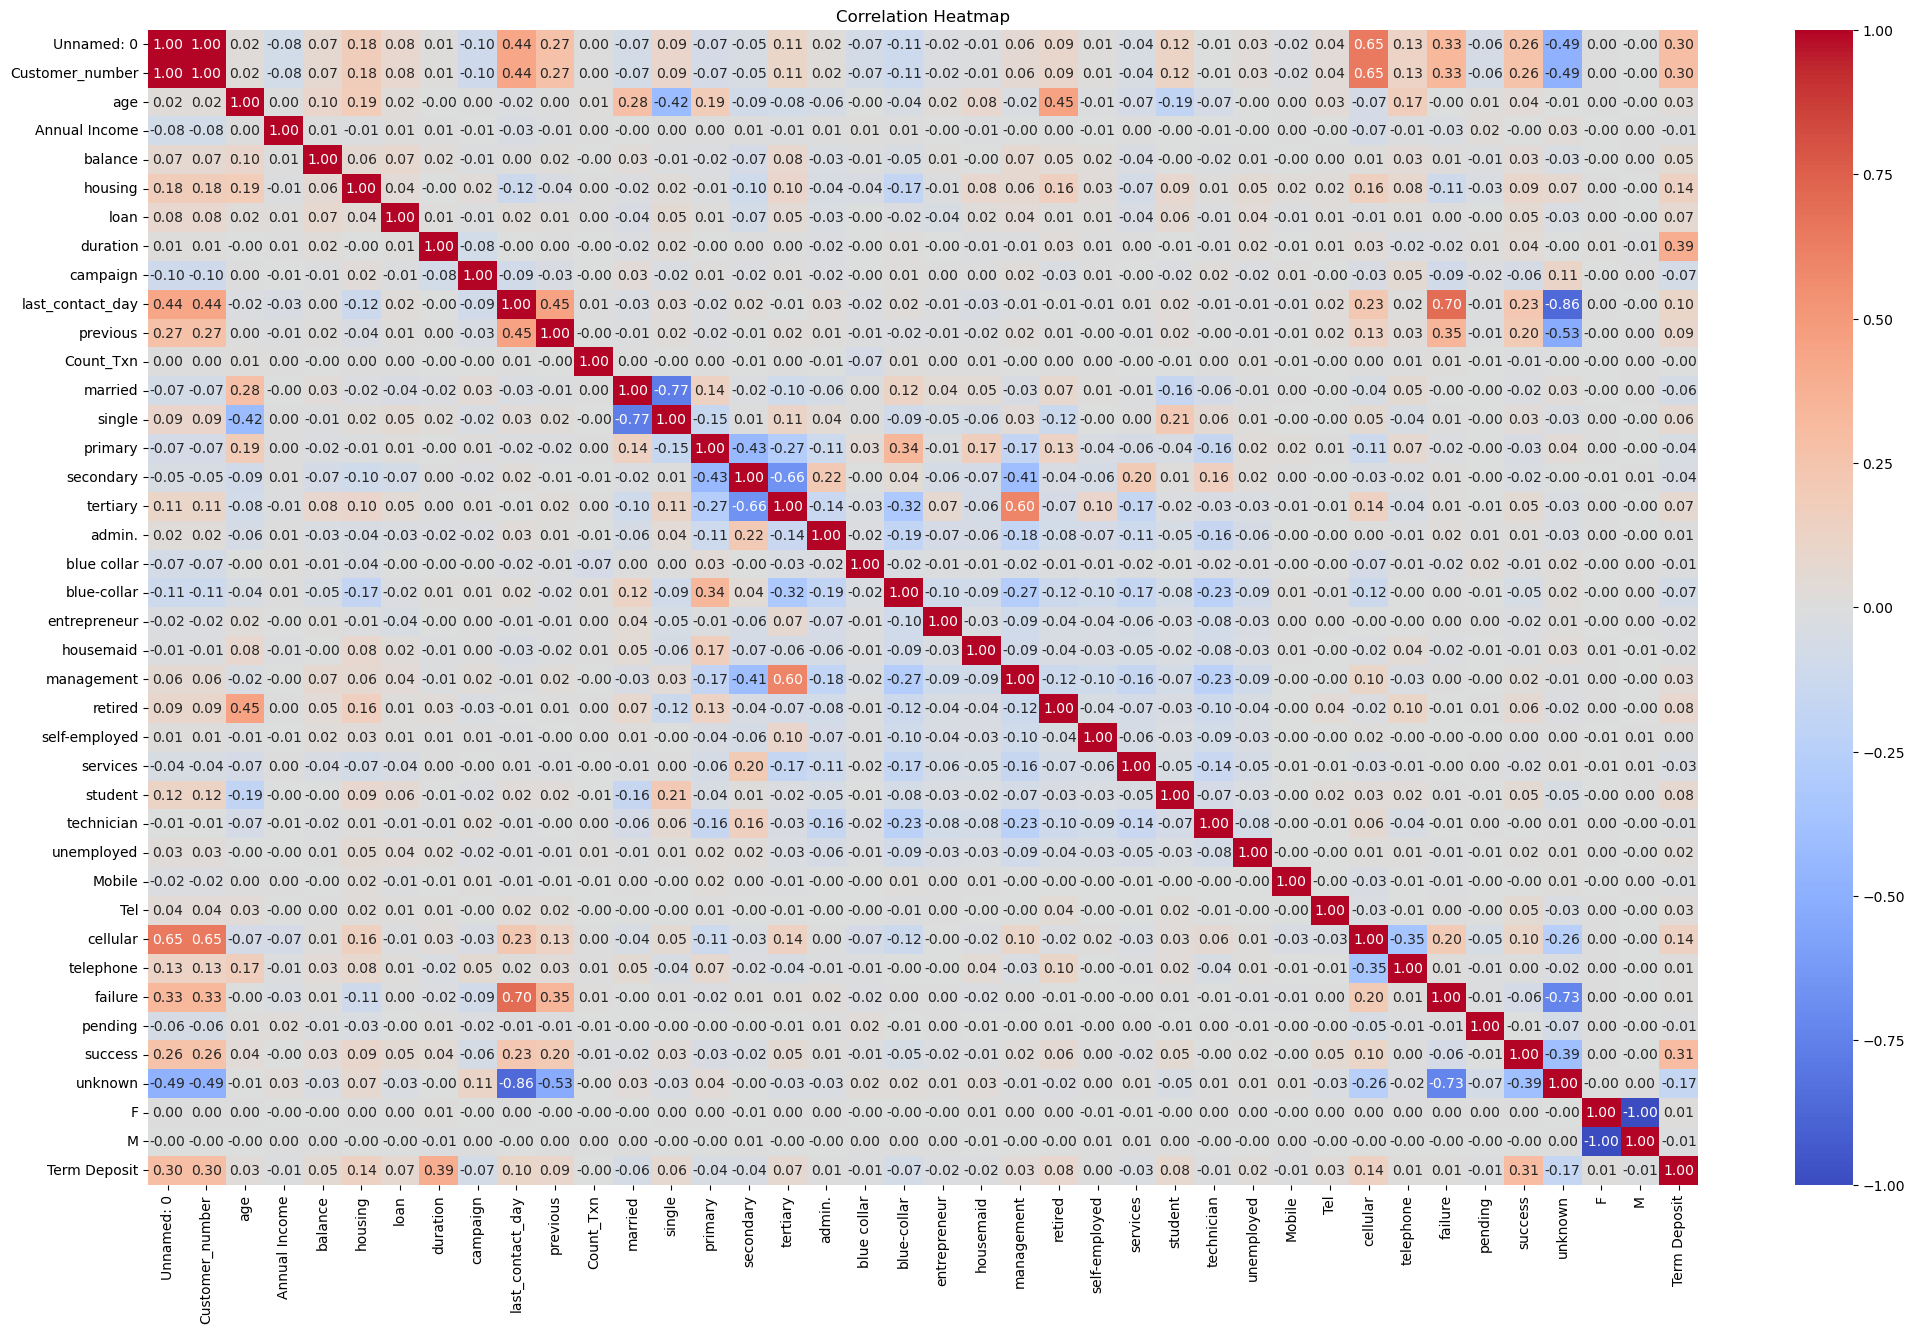

In [10]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

### As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
### Succes, cellular, housing,last_contact_day, and retired are also highly correlated...

# 2. Predictive Model Building:### 	Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.


In [11]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [12]:
#dispaly first 5 rows
df.head()

,Unnamed: 0,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,...,Tel,cellular,telephone,failure,pending,success,unknown,F,M,Term Deposit
0,0,1001,58,839368,2143,0,1.0,261.0,1,2,...,False,False,False,False,False,False,True,False,True,0.0
1,1,1002,44,1452858,29,0,1.0,151.0,1,2,...,False,False,False,False,False,False,True,False,True,0.0
2,2,1003,33,4851383,2,0,0.0,76.0,1,2,...,False,False,False,False,False,False,False,True,False,0.0
3,3,1004,47,3207754,1506,0,1.0,92.0,1,2,...,False,False,False,False,False,False,True,True,False,0.0
4,4,1005,33,2562322,1,1,1.0,198.0,1,2,...,False,False,False,False,False,False,True,False,True,0.0


In [13]:
scaler=StandardScaler()
scaler.fit(df.drop('Term Deposit',axis=1))
scaled_features=scaler.transform(df.drop('Term Deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,Customer_number,age,Annual Income,balance,housing,loan,duration,campaign,last_contact_day,...,Mobile,Tel,cellular,telephone,failure,pending,success,unknown,F,M
0,-1.732012,-1.732012,1.570378,-1.259811,0.241112,-0.893915,0.436888,0.011108,-0.570792,-0.400502,...,-0.025335,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,-0.814940,0.814940
1,-1.731936,-1.731936,0.278645,-0.819715,-0.458727,-0.893915,0.436888,-0.416048,-0.570792,-0.400502,...,-0.025335,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,-0.814940,0.814940
2,-1.731859,-1.731859,-0.736288,1.618264,-0.467665,-0.893915,-2.289320,-0.707290,-0.570792,-0.400502,...,-0.025335,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,-2.104625,1.227084,-1.227084
3,-1.731783,-1.731783,0.555445,0.439184,0.030234,-0.893915,0.436888,-0.645158,-0.570792,-0.400502,...,-0.025335,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,1.227084,-1.227084
4,-1.731706,-1.731706,-0.736288,-0.023826,-0.467996,1.118674,0.436888,-0.233536,-0.570792,-0.400502,...,-0.025335,-0.021037,-1.355833,-0.259382,-0.348687,-0.0349,-0.185948,0.475144,-0.814940,0.814940


In [14]:
# 30% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['Term Deposit'],test_size=0.30, random_state=3)

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.8705727846647614, 0.8875408974981177, 0.8914591284653778, 0.8926599700820645, 0.8930073816214403, 0.8924385014669374, 0.892470087057597, 0.8928492938927868, 0.8933865085689521, 0.8937024843070643, 0.8943977068242053, 0.8945556148055834, 0.8941764678861521, 0.8940817011282137, 0.8939237232451174, 0.8939552988498172, 0.8938605121199593, 0.8939868844404767, 0.8939553188217367, 0.8937973009948014]


Text(0, 0.5, 'Accuracy rate')

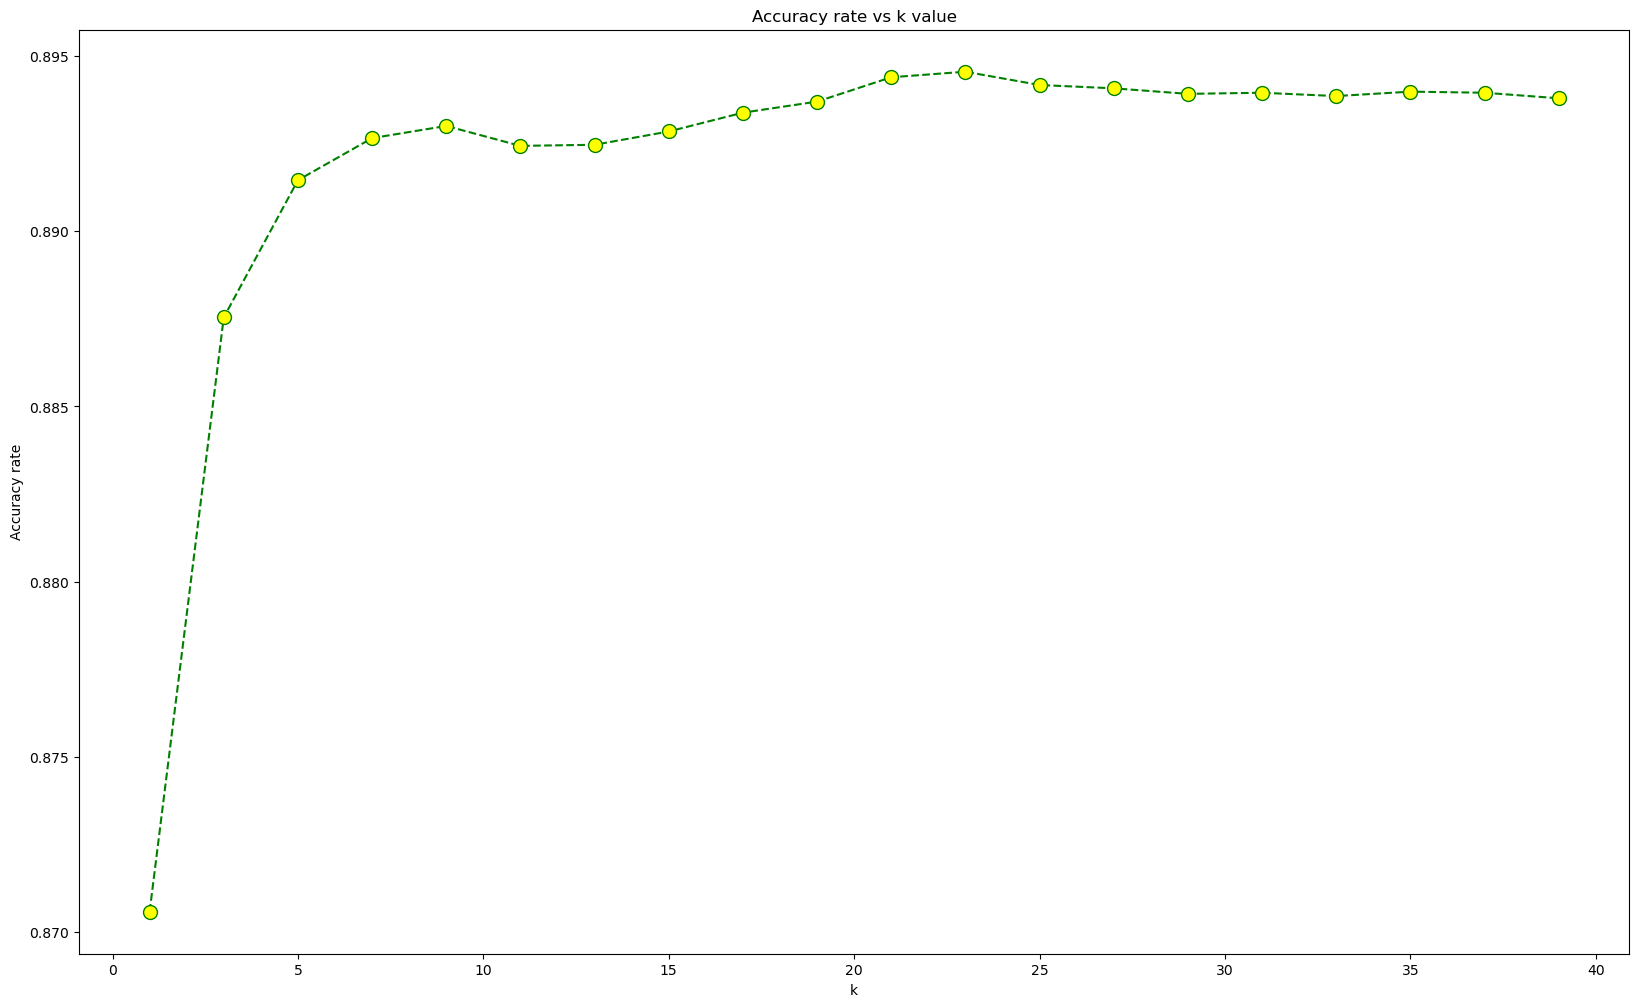

In [16]:
plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [17]:
    knn = KNeighborsClassifier(n_neighbors=23)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
    fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("AUC score for KNN is ",aucScoreKNN)
    print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
    predT=knn.predict(X_train)
    print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
    #print("Best parameters for KNN are ",knn.best_params_)

[[11800   169]
 [ 1252   343]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     11969
         1.0       0.67      0.22      0.33      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.60      0.63     13564
weighted avg       0.88      0.90      0.87     13564

AUC score for KNN is  0.8715985208392317
Test Accuracy score for KNN is  0.8952373930993807
Train Accuracy score for KNN is  0.8969254589692546


In [18]:
# Training Naive bayes
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
aucScoreNB = roc_auc_score(y_test,  y_pred_prob[:,1])
fprNB, tprNB, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreNB)
print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train)
print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test, pred))

[[  258 11711]
 [    0  1595]]
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04     11969
         1.0       0.12      1.00      0.21      1595

    accuracy                           0.14     13564
   macro avg       0.56      0.51      0.13     13564
weighted avg       0.90      0.14      0.06     13564

AUC score for NB is  0.8290316075148157
Test Accuracy score for NB is  0.13661161899144794
Train Accuracy score for NB is  0.1360318513603185
Recall score for NB is  1.0


In [64]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [66]:
xgb_model = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_model, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [67]:
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)

[[11547   422]
 [  732   863]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     11969
         1.0       0.67      0.54      0.60      1595

    accuracy                           0.91     13564
   macro avg       0.81      0.75      0.78     13564
weighted avg       0.91      0.91      0.91     13564

AUC score for XGBOOST is  0.9468284971285539
Test Accuracy score for XGBOOST is  0.9149218519610735
Train Accuracy score for XGBOOST is  0.9225203020823459
Best parameters for XGBOOST are  {'colsample_bytree': 0.61, 'eta': 0.1, 'gamma': 5, 'min_child_weight': 1.0, 'subsample': 0.72}


# 3. Model Improvement Strategies:### 	Discuss potential methods or approaches to enhance model performance. This could include feature engineering, different algorithms, or refining the data preprocessing steps.


# To boost your model's performance, you can try several strategies:

### Feature Engineering: Create new features from your existing data to gain more insights. For example, combining age and income into an "income-to-age ratio" might help understand customer behavior better. Use effective methods to handle categorical variables, like one-hot encoding or target encoding.

### Algorithm Selection: Test different machine learning algorithms to find the best one for your data. If you're using a basic model like logistic regression, try more advanced ones like Random Forests, Gradient Boosting Machines, or Neural Networks.

### Cross-Validation: Use cross-validation to ensure your model performs well across different data subsets, which helps in preventing overfitting and assessing how well it generalizes.

### Feature Selection: Identify and keep the most important features using methods like Recursive Feature Elimination (RFE) or feature importance scores. This can simplify your model and improve its performance.

### Data Preprocessing: Make sure your data is clean and well-prepared. Handle missing values, normalize or standardize features if necessary, and address any class imbalances in your dataset.

## These approaches can help improve the accuracy and reliability of your model.